In [3]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
%matplotlib inline

In [5]:
word_2018 = pd.read_csv('commits-2018.csv').set_index(['word'])
word_2017 = pd.read_csv('commits-2017.csv').set_index(['word'])
df = (word_2018 / word_2017).dropna()

In [6]:
df = df[df.index.notnull()]

In [7]:
df.sort_values('freq')

,freq
word,
cloud,0.052632
assets,0.052632
frewsxcv,0.057143
lvalue,0.058824
depnode,0.062500
remote-tracking,0.074074
tcpstream,0.083333
origin,0.095238
connect,0.100000


In [8]:
d = df.to_dict()['freq']

In [9]:
wordcloud = WordCloud(
    width = 2000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).fit_words(d)

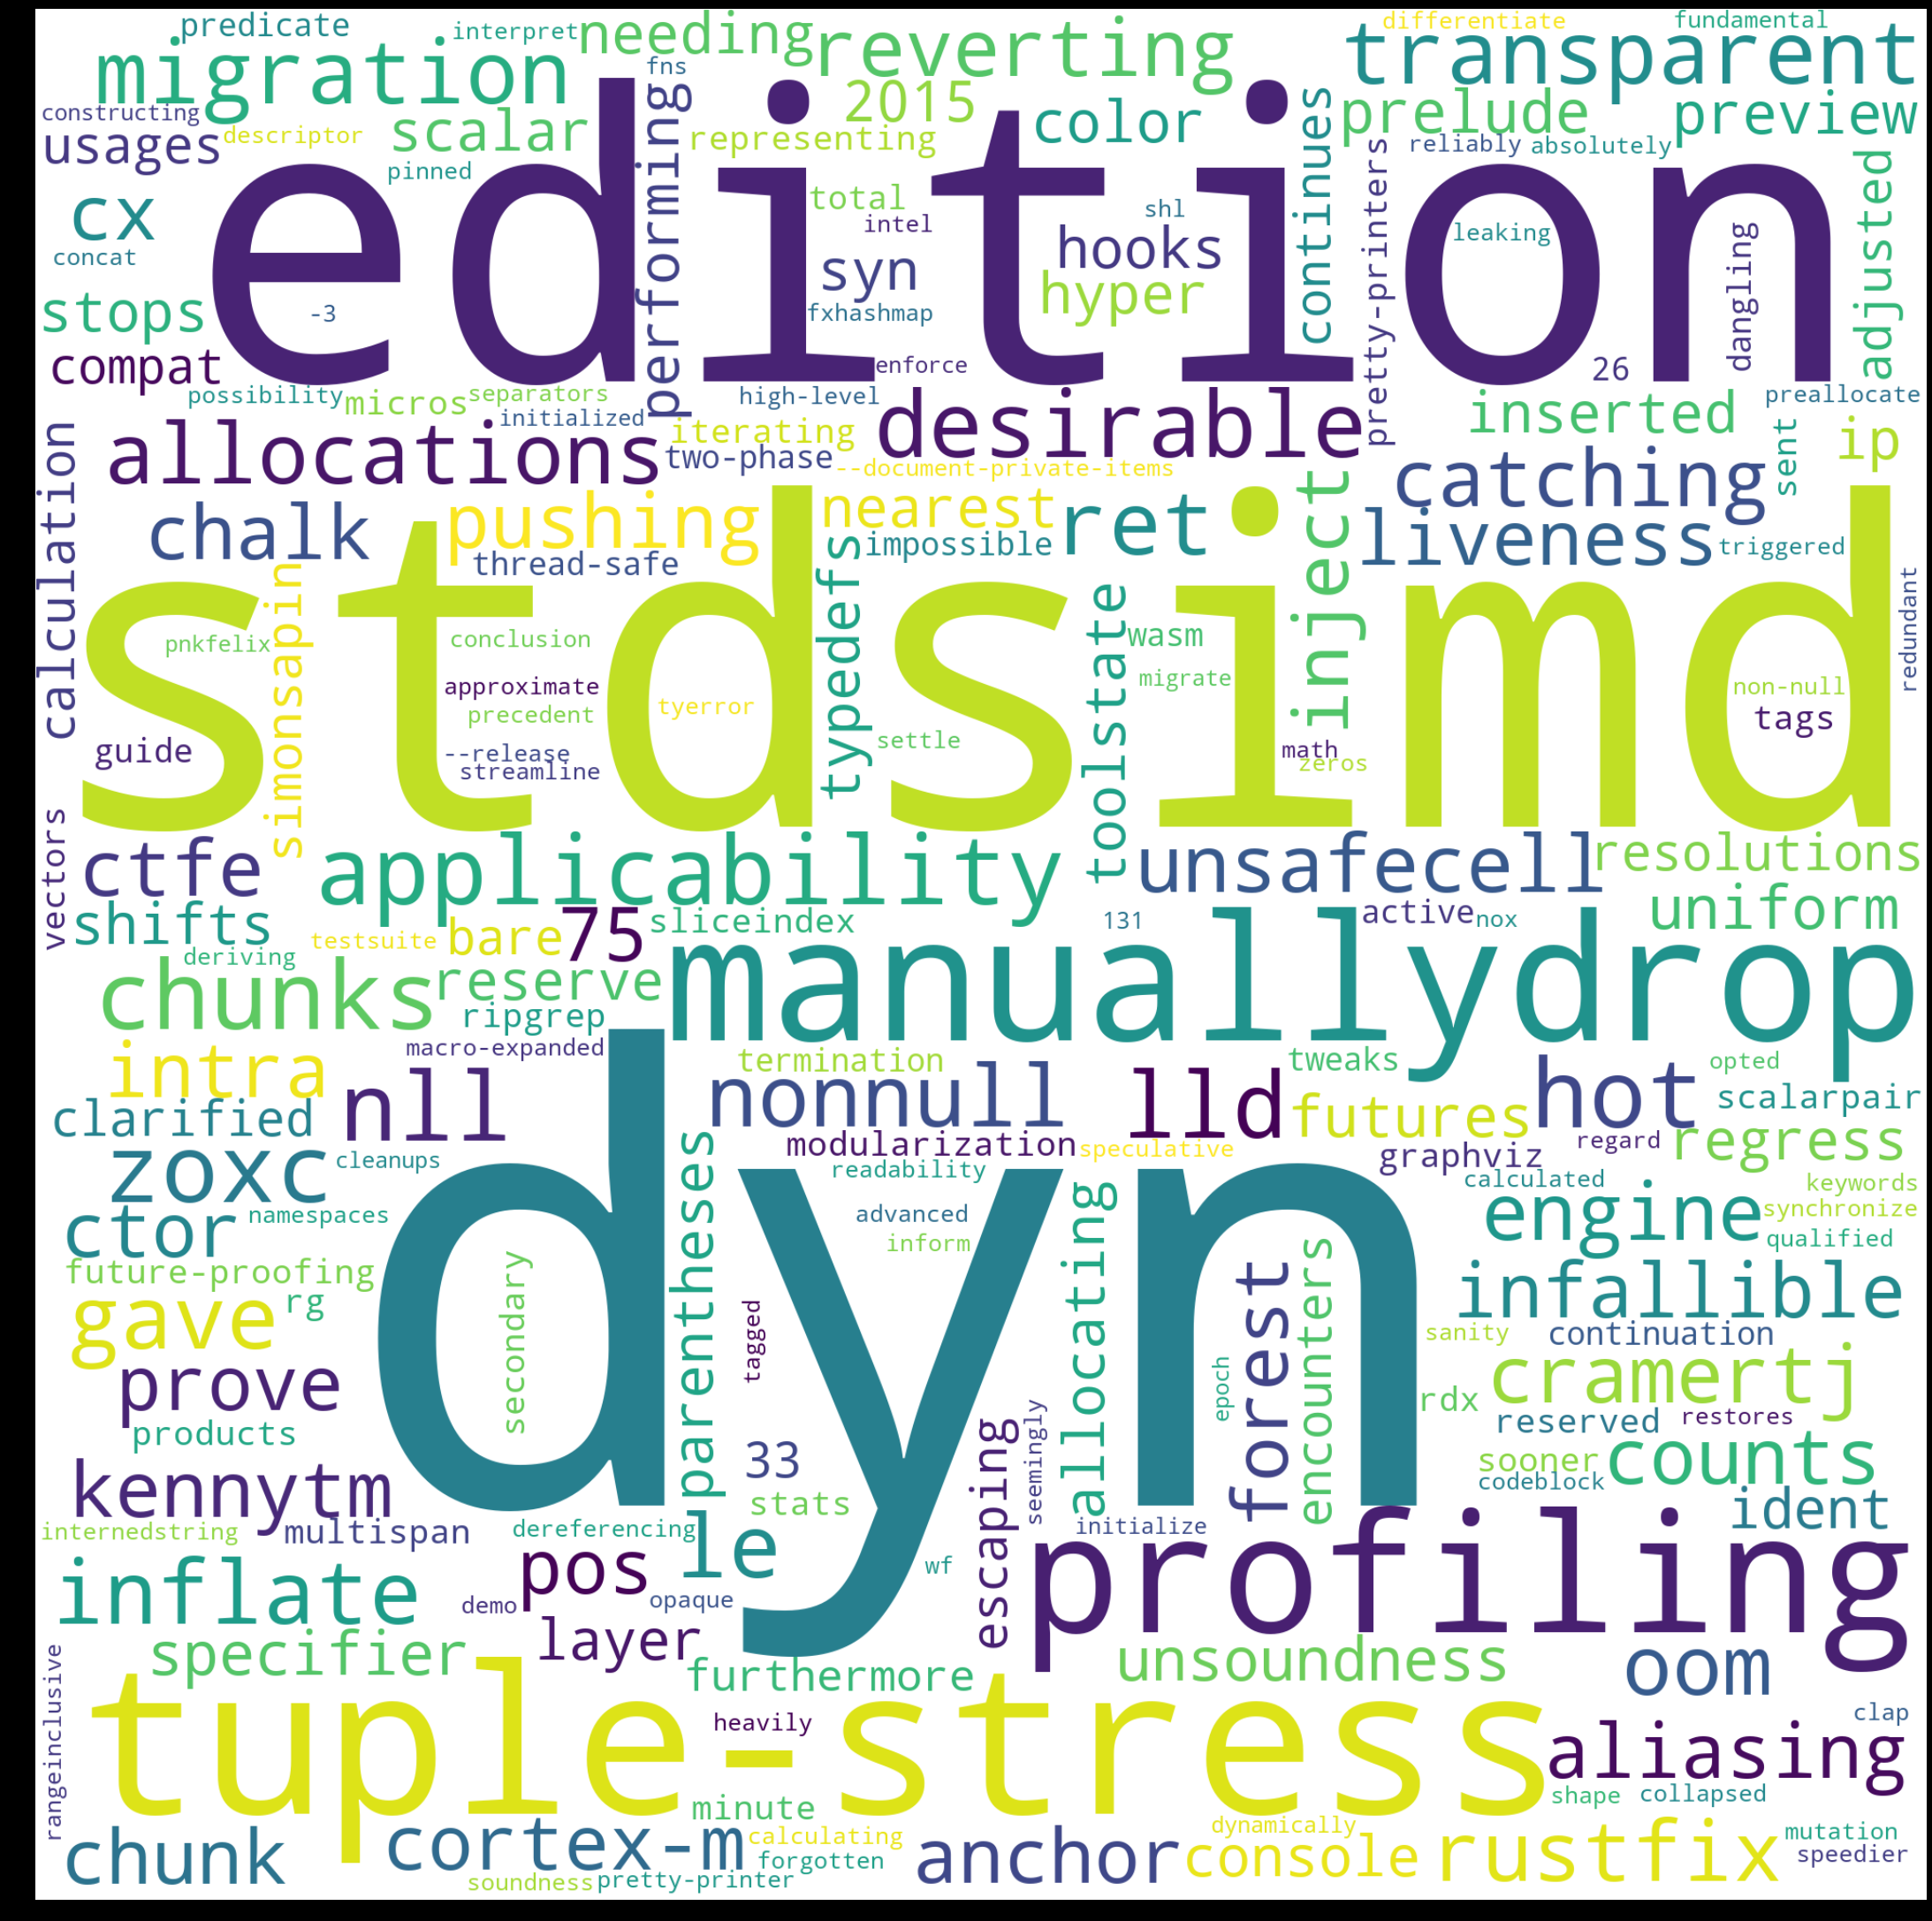

In [10]:
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
ax = plt.show()

In [11]:
wordcloud.to_file('wc.png')

In [12]:
df = word_2017.join(word_2018, lsuffix = '_2017', rsuffix = '_2018').dropna()
df = df[df.index.notnull()]

In [13]:
df['delta_ratio'] = df.freq_2017 / df.freq_2018
df['delta_sub'] = df.freq_2017 - df.freq_2018
#df['delta_i'] = (1.0 - (df.freq_2018 / df.freq_2017)).abs()
#df['sum'] = df.freq_2018 + df.freq_2017

In [15]:
df.sort_values('delta_ratio')

,freq_2017,freq_2018,delta_ratio,delta_sub
word,,,,
dyn,1,32.0,0.031250,-31.0
stdsimd,2,41.0,0.048780,-39.0
edition,5,80.0,0.062500,-75.0
tuple-stress,1,15.0,0.066667,-14.0
manuallydrop,1,14.0,0.071429,-13.0
profiling,1,14.0,0.071429,-13.0
hot,1,13.0,0.076923,-12.0
applicability,1,13.0,0.076923,-12.0
zoxc,1,13.0,0.076923,-12.0


In [16]:
d = df.to_dict()['delta_ratio']

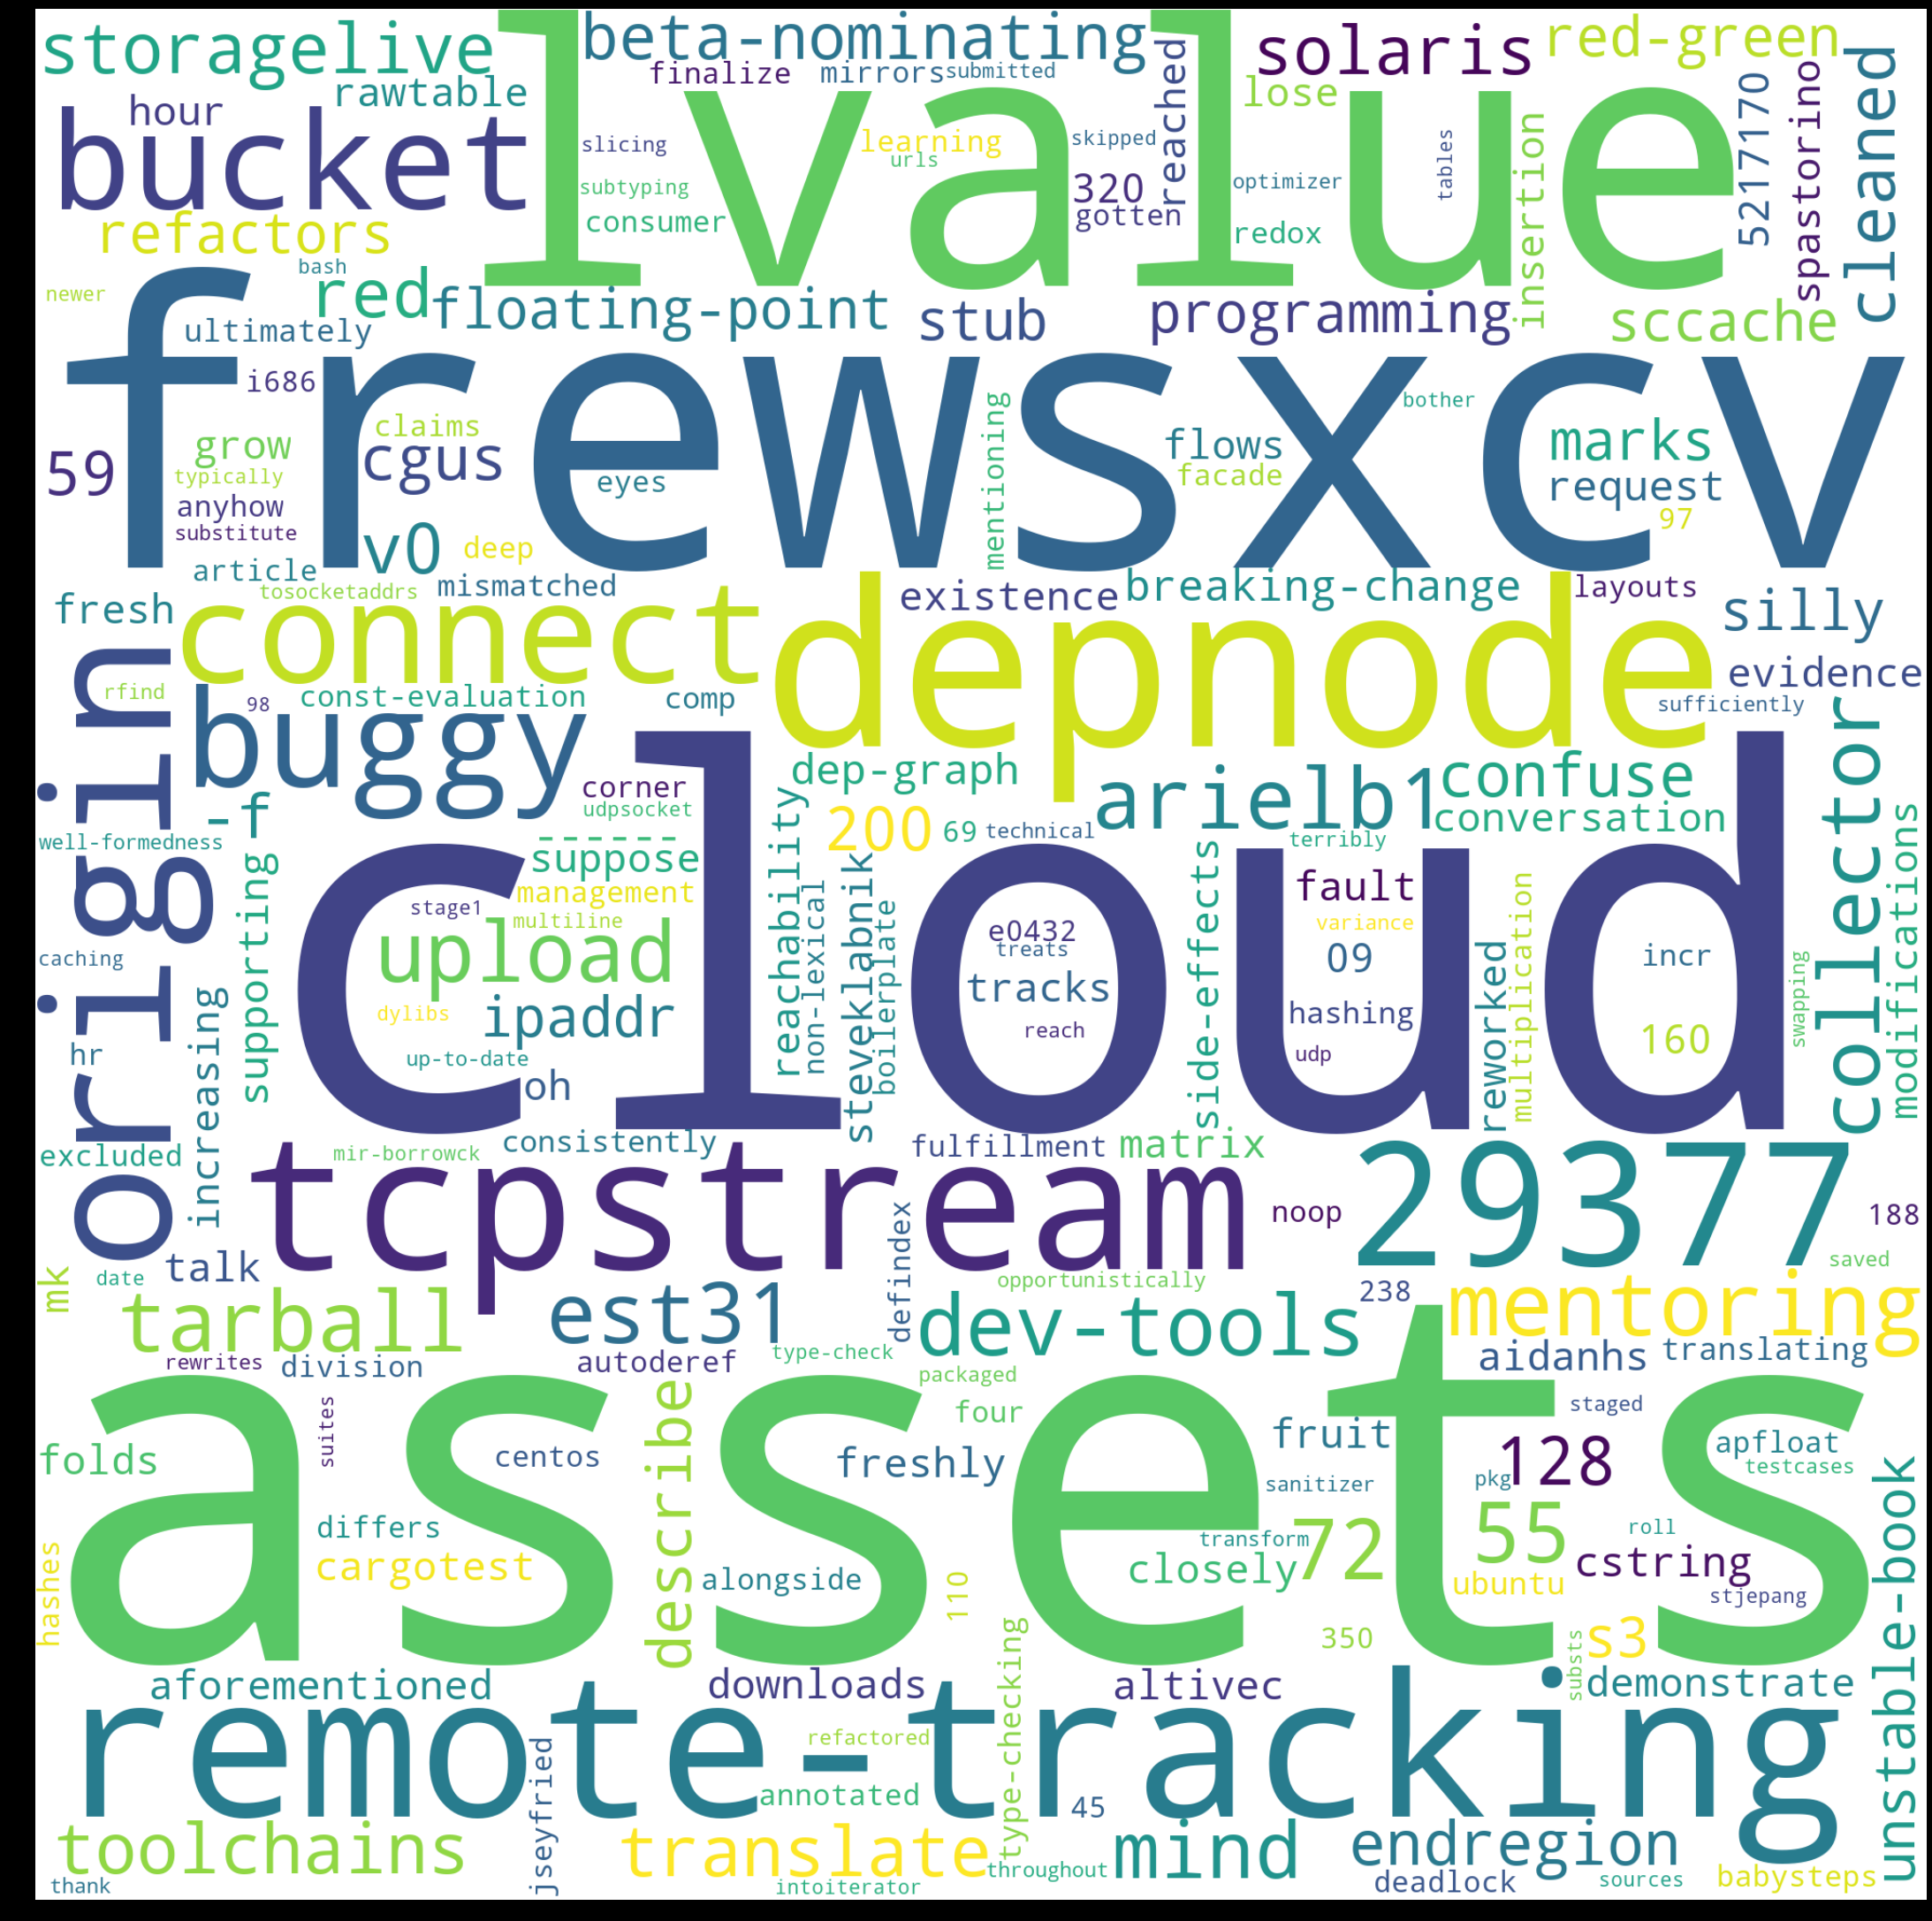

In [17]:
wordcloud = WordCloud(
    width = 2000,
    height = 2000,
    background_color = 'white',
    stopwords = STOPWORDS).fit_words(d)
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
ax = plt.show()

In [18]:
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import nltk

In [19]:
ss = nltk.stem.SnowballStemmer('english')
ps = PorterStemmer()

In [20]:
ps.stem('profiling')

'profil'

In [21]:
ss.stem('profiling')

'profil'